# EWB paper figure 1

We provide the exact code used to generate each figure in order to be completely reproducible and to encourage others to use EWB with their own models quickly. 

In [2]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, events, config
sns.set_theme(style='whitegrid')

In [3]:
# The model is irrelevant for this plot since we are just plotting the cases but we need it to grab the data
model = 'FOUR_v200_GFS'

# grab all of our event types
event_list = [events.HeatWave,
              events.Freeze]
configuration = config.Config(
    event_types=event_list,
    )
default_forecast_config = config.ForecastSchemaConfig()
cases = evaluate.get_case_metadata(eval_config=configuration)

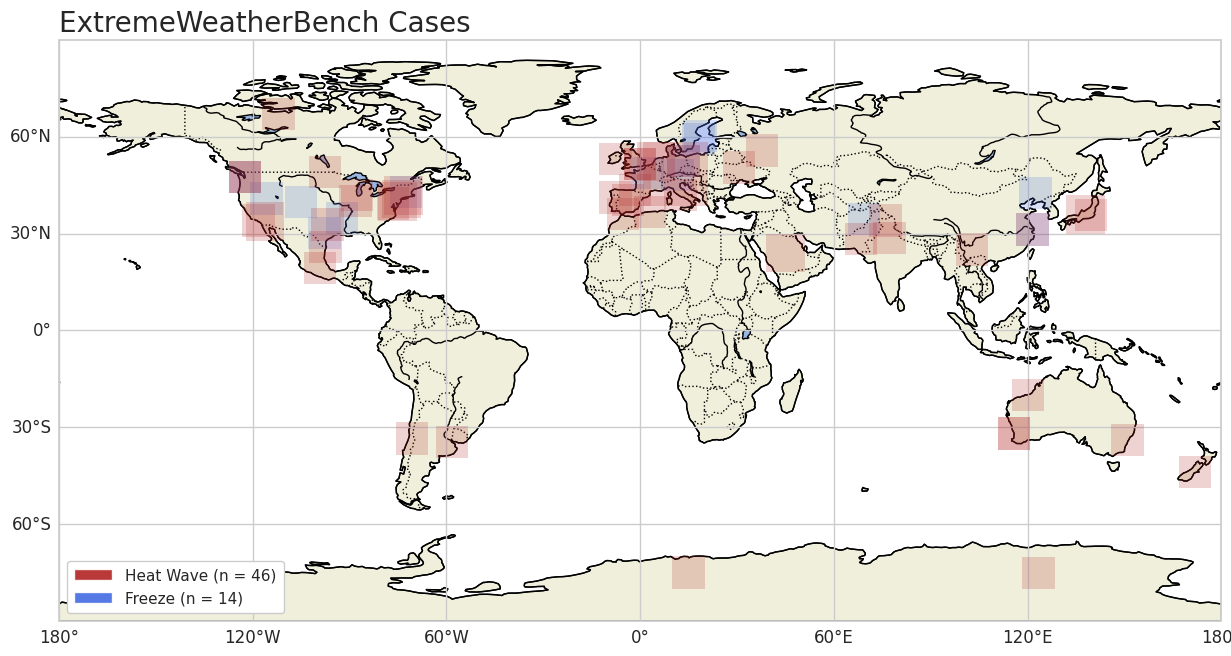

In [ ]:
# plot all cases on one giant world map
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Define colors for each event type
event_colors = {
    'severe_day': 'darkslategray',
    'heat_wave': 'firebrick',
    'freeze': 'royalblue',
    
}

# Initialize counts for each event type
counts_by_type = dict({'freeze': 0, 'heat_wave': 0})

# Plot boxes for each case
for event in cases[::-1]:
    for indiv_case in event.cases:
        lat = indiv_case.location.latitude
        lon = indiv_case.location.longitude
        half_box = indiv_case.bounding_box_degrees
        
        # Get color based on event type
        event_type = indiv_case.event_type
        color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

        # count the events by type
        counts_by_type[event_type] += 1

        # Create a rectangle around the indiv_case location
        rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                linewidth=0, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.2)
        ax.add_artist(rect)

# Create a custom legend for event types
from matplotlib.patches import Patch
legend_elements = [
    #Patch(facecolor=event_colors['severe_day'], alpha=0.8, label='Severe Event']),
    Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
    Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
]
# Create a larger legend by specifying a larger font size in the prop dictionary
ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
ax.set_title('ExtremeWeatherBench Cases', loc='left', fontsize=20)
plt.savefig('extreme_weather_cases.png', transparent=True)

30.2672 262.2569
True
False
34.7445 267.7104
True
False
48.1351 11.582
True
False
31.2304 121.4737
True
False
34.5553 69.2075
True
False
39.7392 255.0097
True
False
47.6062 237.6679
True
False
40.8324 244.2369
True
False
42.8509 287.4421
True
False
59.3293 18.0686
True
False
52.52 13.405
True
False
48.8566 2.3522
True
False
42.5246 122.3853
True
False
60.1282 18.6435
True
False
47.6062 237.6679
True
False
41.8781 272.3702
True
False
34.0522 241.7563
True
False
32.7767 263.203
True
False
47.6062 237.6679
True
False
39.2904 283.38779999999997
True
False
-31.9505 115.8605
False
False
53.1424 352.3079
True
False
41.9028 12.4964
True
False
40.4637 356.2508
True
False
-34.6037 301.6184
False
False
31.2304 121.4737
True
False
25.0458 102.71
True
False
36.7372 3.0869
True
False
41.1496 352.389
True
False
36.1408 354.64639999999997
True
False
28.6139 77.209
True
False
55.7558 37.6173
True
False
52.52 13.405
True
False
51.5074 359.8722
True
False
51.5074 359.8722
True
False
43.4832 358.4414
True

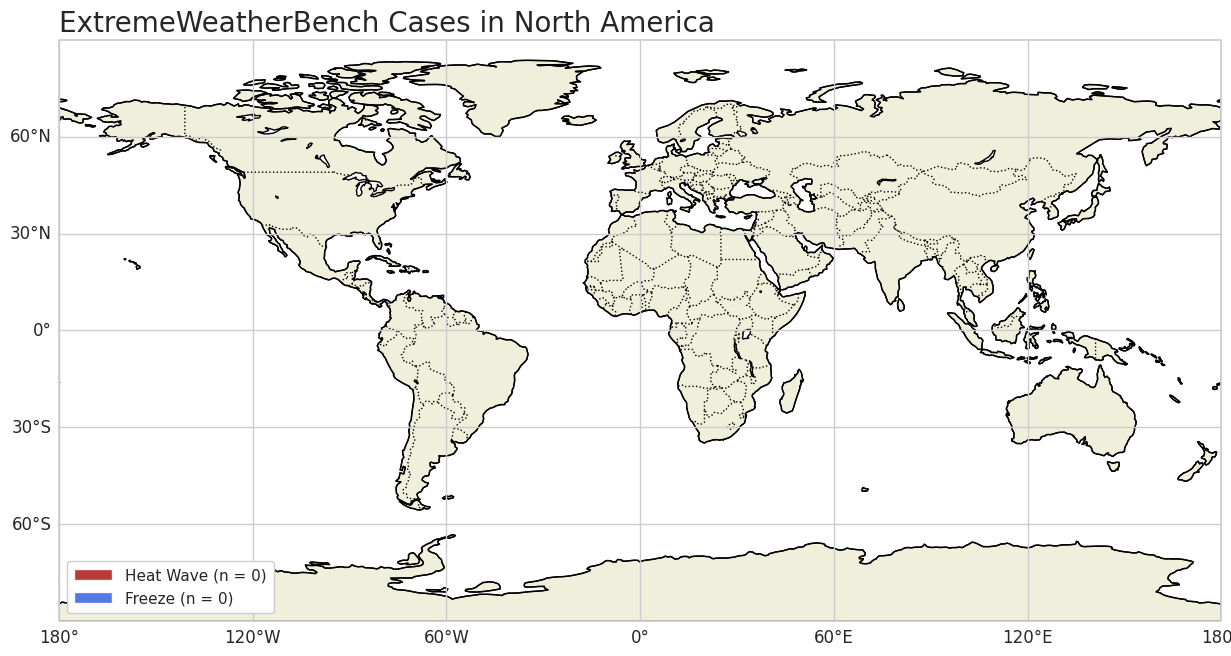

In [70]:
# plot only the North American cases 
fig = plt.figure(figsize=(15, 10))
#ax = plt.axes(projection=ccrs.LambertConformal())
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white')
na_bot_lat = 7
na_top_lat = 71
na_left_lon = -172
na_right_lon = -65
my_box = [na_left_lon, na_right_lon, na_bot_lat, na_top_lat]
#ax.set_extent(my_box, crs=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Define colors for each event type
event_colors = {
    'severe_day': 'darkslategray',
    'heat_wave': 'firebrick',
    'freeze': 'royalblue',
    
}

# Initialize counts for each event type
counts_by_type = dict({'freeze': 0, 'heat_wave': 0})

# Plot boxes for each case
for event in cases[::-1]:
    for indiv_case in event.cases:
        lat = indiv_case.location.latitude
        lon = indiv_case.location.longitude

        # Check if the case is in North America and skip if not
        print(lat, lon)
        print((lat < na_top_lat and lat > na_bot_lat))
        print((lon < na_right_lon and lon > na_left_lon))
        if (lat < na_top_lat and lat > na_bot_lat and lon < na_right_lon and lon > na_left_lon):
            half_box = indiv_case.bounding_box_degrees
            
            # Get color based on event type
            event_type = indiv_case.event_type
            color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

            # count the events by type
            counts_by_type[event_type] += 1

            # Create a rectangle around the indiv_case location
            rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                    linewidth=0, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.2)
            if (event_type == 'freeze'):
                ax.add_artist(rect)

# Create a custom legend for event types
from matplotlib.patches import Patch
legend_elements = [
    #Patch(facecolor=event_colors['severe_day'], alpha=0.8, label='Severe Event']),
    Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
    Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
]
# Create a larger legend by specifying a larger font size in the prop dictionary
#legend_prop = prop.copy()
#legend_prop.set_size(20)  # Increase font size for legend
ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
ax.set_title('ExtremeWeatherBench Cases in North America', loc='left', fontsize=20)
plt.savefig('extreme_weather_cases_NA.png', transparent=True)